In [56]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
%matplotlib inline

tdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mathproblem/train.csv')
print(tdf.head())

                                             problem  category
0  At a ring toss game at a carnival, Marco throw...        19
1  What is `471 ÷ 100`? Interactive: Students fol...        22
2  Follow the directions below to create an equiv...        20
3  Solve the following system by substitution:\n`...        14
4  Solve the following system by substitution:\n`...        14


In [57]:
tdf.category.value_counts()

7     19
16    11
0     10
22    10
4     10
11    10
3     10
2     10
6     10
12    10
5     10
13    10
9     10
15    10
1     10
23    10
8     10
24    10
14    10
17     9
19     9
18     8
10     8
20     8
21     8
Name: category, dtype: int64

In [58]:
tdf.shape

(250, 2)

In [59]:
column_names = tdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['problem', 'category']


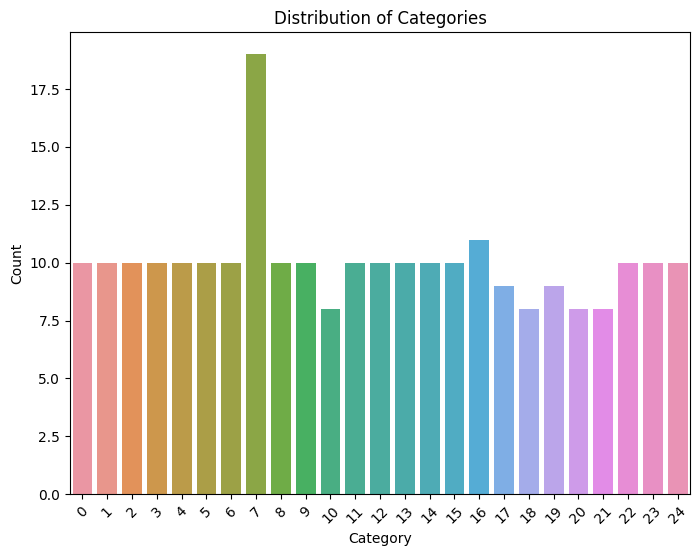

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=tdf,)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [61]:
def print_plot(index):
    example = tdf[tdf.index == index][['problem', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('problem:', example[1])
print_plot(11)

Violet and Eri are taking surf lessons. Violet pays `$20` for her lesson and `$15` per hour to rent the surfboard. Eri pays `$35` for her lesson and `$10` per hour to rent the surfboard. Write two equations in slope-intercept form to represent each person's total cost `(y)`, in terms of the number of hours `(x)`.

problem: 16


In [62]:
X = tdf.problem
y = tdf.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [74]:
# Import required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Create the pipeline with FeatureUnion
nb = Pipeline([
    ('features', FeatureUnion([
        ('vect_count', CountVectorizer()),
        ('vect_tfidf', TfidfVectorizer())
    ])),
    ('clf', MultinomialNB())
])
param_grid = {'features__vect_count__ngram_range': [(1, 3), (2, 2)],  # Try unigrams, bigrams, trigrams, and bigrams only for CountVectorizer
    'features__vect_tfidf__ngram_range': [(1, 1), (2, 2), (1, 3)],  # Try unigrams, bigrams, trigrams, and bigrams only for TfidfVectorizer
    'features__vect_tfidf__use_idf': [True, False],  # Try with or without inverse document frequency for TfidfVectorizer
    'clf__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001, 1.0],  # Different values of alpha for MultinomialNB
}
grid_search = GridSearchCV(nb, param_grid, cv=6, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Print classification report and other metrics
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Best hyperparameters: {'clf__alpha': 0.0001, 'features__vect_count__ngram_range': (2, 2), 'features__vect_tfidf__ngram_range': (1, 3), 'features__vect_tfidf__use_idf': False}
Best accuracy: 0.7947118241235889
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.7746666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       0.75      0.75      0.75         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00  

In [68]:
TestData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mathproblem/test.csv")
TestData

,problem,category
0,"<p>For graduating from middle school, Wayne r...",NaN
1,<p>Mrs. O'Hare bought `18` packs of pencils to...,NaN
2,<p>Annalise bought `p` pens last week and `15`...,NaN
3,<p>Felicia is decorating cupcakes for a party....,NaN
4,<p>Write an expression to match the phrase:</p...,NaN
...,...,...
120,<p>Veronica has `d` more dresses than Larisa d...,NaN
121,<p>Write an equation to match the phrase:</p><...,NaN
122,<p>Follow the directions below to create an eq...,NaN
123,<p>What is `7.5 ÷ 10`?</p><selectivedisplay da...,NaN


No charts were generated by quickchart
No charts were generated by quickchart


In [78]:
# Load the test data into a pandas DataFrame
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mathproblem/test.csv")  # Replace "test_data.csv" with the actual filename

# Extract the text data from the test data
X_test_new = test_data["problem"]

# Predict on the new test data using the best model
y_pred_new = best_model.predict(X_test_new)

# Add the predictions to the test data DataFrame
test_data["category"] = y_pred_new

# Save the results to a new CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Mathproblem/test_results.csv", index=False)  # Replace "test_results.csv" with the desired output filename
